In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import datetime
import statsmodels.api as sm

In [2]:
#read the dataset
df=pd.read_csv('E:\Lam Nhut Thinh\\focus_cleaned.csv')
df

,Unnamed: 0,model,year,price,transmission,mileage,fuel type,engine size
0,0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...,...
5449,5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


In [3]:
#drop unnecessary columns
df=df.drop('Unnamed: 0',axis=1)
df

,model,year,price,transmission,mileage,fuel type,engine size
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0


In [4]:
#calculate age of the cars
df['age'] = datetime.datetime.now().year-df['year']
df

,model,year,price,transmission,mileage,fuel type,engine size,age
0,Focus,2016,8000,Manual,38852,Petrol,1.0,6
1,Focus,2019,13400,Manual,11952,Petrol,1.0,3
2,Focus,2019,14600,Manual,22142,Petrol,1.5,3
3,Focus,2016,9450,Manual,14549,Diesel,1.6,6
4,Focus,2015,9999,Manual,7010,Diesel,1.6,7
...,...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,2.0,3
5450,Focus,2019,16350,Manual,13891,Petrol,1.0,3
5451,Focus,2019,16850,Manual,13452,Petrol,1.0,3
5452,Focus,2019,17310,Automatic,13376,Petrol,1.0,3


In [5]:
#some basic stats 
df.describe()

,year,price,mileage,engine size,age
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,2017.113495,13581.958379,22876.582692,1.362926,4.886505
std,2.170301,4737.282779,20596.754387,0.400450,2.170301
min,2002.000000,495.000000,1.000000,0.000000,2.000000
25%,2016.000000,10489.250000,9137.000000,1.000000,3.000000
50%,2017.000000,13299.500000,15944.500000,1.500000,5.000000
75%,2019.000000,16987.250000,30000.000000,1.600000,6.000000
max,2020.000000,54995.000000,177644.000000,2.500000,20.000000


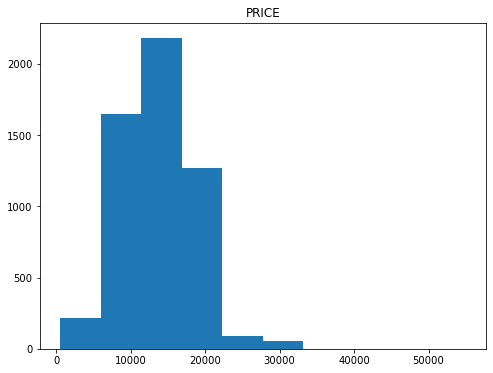

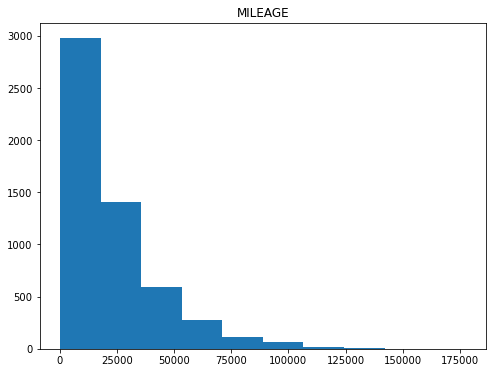

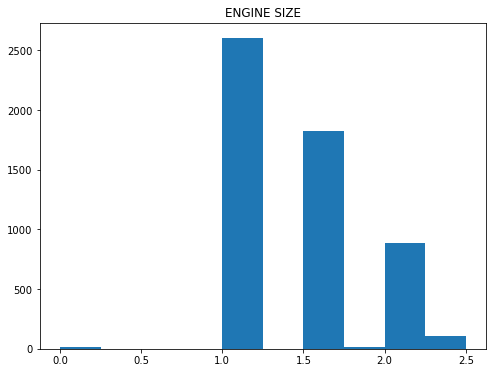

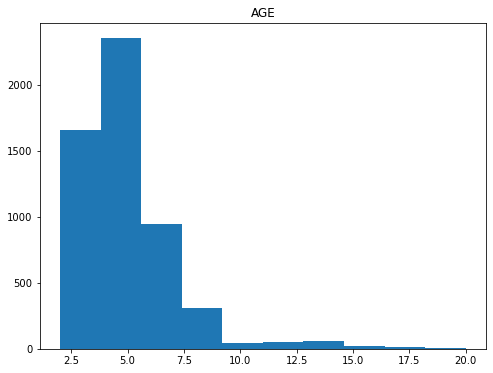

In [6]:
#visualize numeric columns
for i in ['price','mileage','engine size','age']:
    plt.figure(figsize = (8,6))
    plt.hist(df[i])
    plt.title(i.upper())
    plt.show()

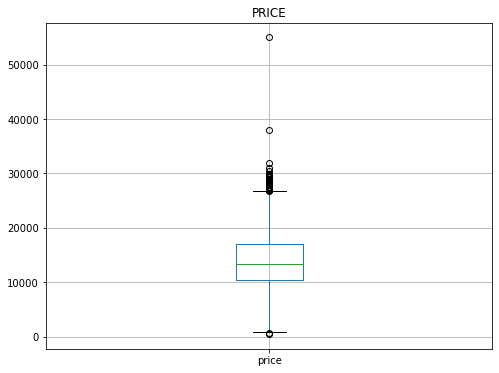

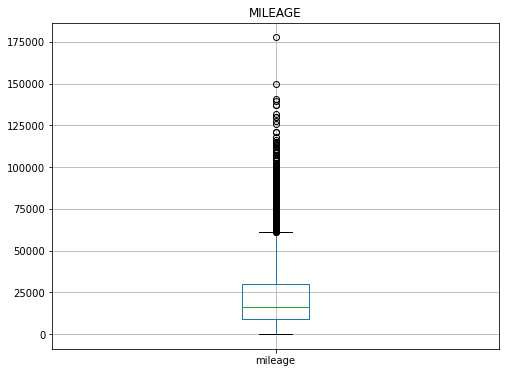

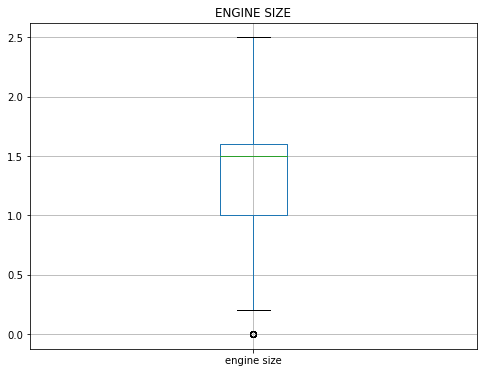

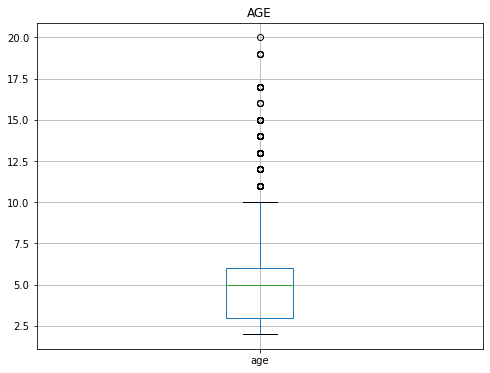

In [7]:
for i in ['price','mileage','engine size','age']:
    plt.figure(figsize = (8,6))
    df.boxplot(column=i)
    plt.title(i.upper())
    plt.show()

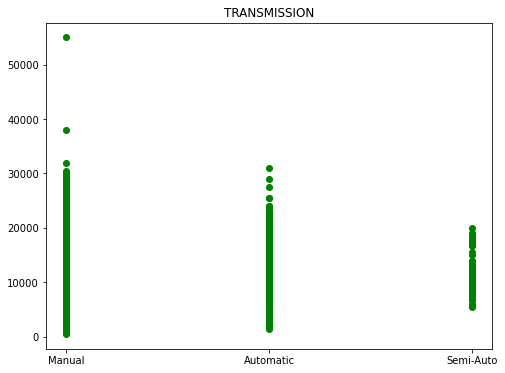

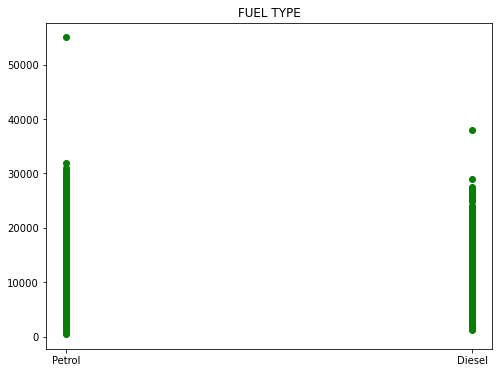

In [8]:
for i in ['transmission','fuel type']:
    plt.figure(figsize = (8,6))
    plt.scatter(data=df,x=i,y='price',color='green')
    plt.title(i.upper());

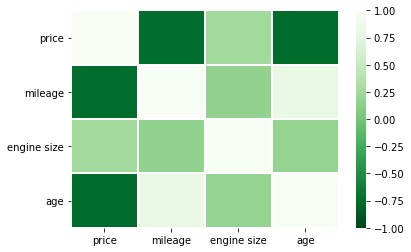

In [9]:
sns.heatmap(df[['price','mileage','engine size','age']].corr(),cmap='Greens_r',vmin=-1,vmax=1,linewidths=1);

In [10]:
df=pd.get_dummies(df)

In [11]:
df

,year,price,mileage,engine size,age,model_ Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuel type_Diesel,fuel type_Petrol
0,2016,8000,38852,1.0,6,1,0,1,0,0,1
1,2019,13400,11952,1.0,3,1,0,1,0,0,1
2,2019,14600,22142,1.5,3,1,0,1,0,0,1
3,2016,9450,14549,1.6,6,1,0,1,0,1,0
4,2015,9999,7010,1.6,7,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5449,2019,18745,7855,2.0,3,1,0,1,0,1,0
5450,2019,16350,13891,1.0,3,1,0,1,0,0,1
5451,2019,16850,13452,1.0,3,1,0,1,0,0,1
5452,2019,17310,13376,1.0,3,1,1,0,0,0,1


In [12]:
X=df.drop(['price','year'],axis=1)
y=df['price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression, Lasso
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = LinearRegression()
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     3617.
Date:                Mon, 21 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:11:28   Log-Likelihood:                -39203.
No. Observations:                4363   AIC:                         7.842e+04
Df Residuals:                    4356   BIC:                         7.846e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mileage                   -0

In [15]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Khang Lam\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,transmission_Automatic,inf
5,transmission_Manual,inf
6,transmission_Semi-Auto,inf
7,fuel type_Diesel,inf
8,fuel type_Petrol,inf
0,mileage,3.15
2,age,3.04
1,engine size,1.38
3,model_ Focus,0.00


In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
lm = LinearRegression()
lm.fit(X_train,y_train)
abs(np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))

1366.4695885204503

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6864235833.275864, tolerance: 7787994.42025756
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
 

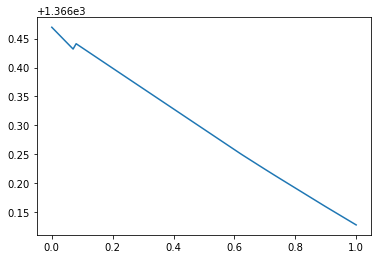

In [18]:
alpha = []
error = []

for i in range(0,101):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(abs(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))))
plt.plot(alpha,error);

In [19]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.0,1366.469589


In [20]:
lm_l = Lasso(1)
lm_l.fit(X_train,y_train)
abs(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv = 5)))

1366.1279648310856

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
abs(np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv = 5)))

935.9961766853663

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def evaluateRegressor(true,predicted,modelname):
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    R_squared = r2_score(true,predicted)
    print(modelname)
    print("\tMAE:", MAE)
    print("\tRMSE:", RMSE)
    print("\tR-squared:", R_squared)

In [23]:
y_pred_lm=lm.predict(X_test)
y_pred_lm_l=lm_l.predict(X_test)
y_pred_rf=rf.predict(X_test)

In [24]:
print('Model Evaluation')
evaluateRegressor(y_test,y_pred_lm,'Linear Regression')
evaluateRegressor(y_test,y_pred_lm_l,'Lasso Regression')
evaluateRegressor(y_test,y_pred_rf,'Random Forest Regression')

Model Evaluation
Linear Regression
	MAE: 1378.8456392924038
	RMSE: 1914.550296870124
	R-squared: 0.8396259990014057
Lasso Regression
	MAE: 1378.9298748277422
	RMSE: 1914.667364361834
	R-squared: 0.8396063858775714
Random Forest Regression
	MAE: 903.3882691184555
	RMSE: 1357.5576965989758
	R-squared: 0.9193662242638232


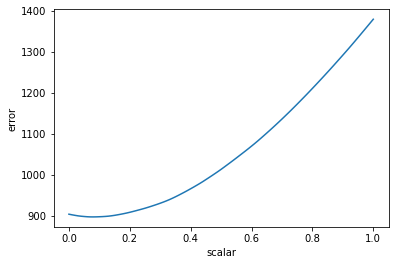

In [25]:
scalar = []
combine_error = []

for i in range(0,101):
    scalar.append(i/100)
    combine_error.append(mean_absolute_error(y_test,(i/100)*y_pred_lm+((100-i)/100)*y_pred_rf))
plt.plot(scalar,combine_error)
plt.ylabel('error')
plt.xlabel('scalar')
plt.show();

In [26]:
print(f'The value of scalar which minimize the error is {scalar[combine_error.index(min(combine_error))]}')

The value of scalar which minimize the error is 0.08
